# Chinook Database SQL Analysis

This project analyzes sales and customer data from the Chinook music store database using SQL.

**Objectives:**

- Analyse revenue performance
- Identify top customers and products
- Examine sales trends

Database: SQLite  
Queries: Stored in `/queries` folder

In [2]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('../data/Chinook_Sqlite.sqlite')

---

## Question 1: What is the total revenue?

**Business Question:**

Understanding total revenue provides a high-level view of overall business performance.

In [40]:
# Question 1 — Total Revenue

with open('../queries/01_total_revenue.sql', 'r') as file:
    query = file.read()

total_revenue = pd.read_sql(query, conn)

total_revenue

,Revenue
0,2328.6


**Insight:**

The Chinook store has generated a total revenue of **$2328.60**.

This metric serves as a baseline for evaluating customer value, product performance, and sales trends in subsequent analysis.

---

## Question 2: How many customers does the store have?

**Business Question:**

Understanding the number of unique customers purchasing from the store gives us important descriptive information.

In [19]:
# Question 2 — Total Customers

with open('../queries/02_total_customers.sql', 'r') as file:
    query = file.read()

total_customers = pd.read_sql(query, conn)

total_customers

,COUNT(DISTINCT CustomerId)
0,59


**Insight:**

The Chinook store has **59** unique customers. 

This indicates the store operates with a relatively small, defined customer base.

This information could be useful for customer retention, loyalty programs, and more generally to understand customer demographics.

---

## Question 3: Which countries generate the most revenue?

**Business Question:**

Exploring which countries generate the most revenue can give insight into market strength in different locations.

In [71]:
# Question 3 - Revenue by country

with open('../queries/03_country_revenue.sql', 'r') as file:
    query = file.read()

country_revenue = pd.read_sql(query, conn)

country_revenue

,BillingCountry,Revenue
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


**Insight:**

The Chinook store serves **24** different geographical regions. The largest markets are in **USA, Canada, and France**.

Based on revenue, many of these countries only have one or two customers. 

Marketing efforts should continue to prioritize the largest market, USA, while exploring growth opportunities in smaller markets.

---

## Question 4: Who are the top 10 customer by total spending?

**Business Question:**

Identifying top customers can be useful for loyalty and/or reward programs.

In [45]:
# Question 4 - Top 10 customers

with open('../queries/04_top_customers.sql', 'r') as file:
    query = file.read()

top_customers = pd.read_sql(query, conn)

display(top_customers)

top_10_revenue = top_customers['CustomerSpend'].sum()
top_10_pct = (top_10_revenue / total_revenue['Revenue'].iloc[0]) * 100
print(f"Top 10 customers account for {top_10_pct:.2f}% of total revenue")

,CustomerId,Name,CustomerSpend,Country
0,6,Helena Holý,49.62,Czech Republic
1,26,Richard Cunningham,47.62,USA
2,57,Luis Rojas,46.62,Chile
3,45,Ladislav Kovács,45.62,Hungary
4,46,Hugh O'Reilly,45.62,Ireland
5,24,Frank Ralston,43.62,USA
6,28,Julia Barnett,43.62,USA
7,37,Fynn Zimmermann,43.62,Germany
8,7,Astrid Gruber,42.62,Austria
9,25,Victor Stevens,42.62,USA


Top 10 customers account for 19.38% of total revenue


**Insight:**

The top 10 customers account for 19.38% of total revenue. This indicates that spending is fairly evenly distributed.

This group of customers spent between **$42.62** and **$49.62**, with **Helena Holý, Richard Cunningham, and Luis Rojas** as the top 3 spenders. 

These high-value customers represent a key target for loyalty programs, personalised promotions, or retention initiatives.  

---

## Question 5: What are the top 10 tracks by total revenue?

**Business Question:**

Identifying top songs by revenue can provide insight into what customers are listening to and why.

In [ ]:
# Question 5 - Top 10 Tracks

with open('../queries/05_top_tracks.sql', 'r') as file:
    query = file.read()

top_tracks = pd.read_sql(query, conn)

top_tracks

,TrackId,Name,Artist,Album,Revenue
0,2832,The Woman King,Battlestar Galactica,"Battlestar Galactica, Season 3",3.98
1,2850,The Fix,Heroes,"Heroes, Season 1",3.98
2,2868,Walkabout,Lost,"Lost, Season 1",3.98
3,3177,Hot Girl,The Office,"The Office, Season 1",3.98
4,3200,Gay Witch Hunt,The Office,"The Office, Season 3",3.98
5,3214,Phyllis's Wedding,The Office,"The Office, Season 3",3.98
6,3223,How to Stop an Exploding Man,Heroes,"Heroes, Season 1",3.98
7,3250,Pilot,Aquaman,Aquaman,3.98
8,2820,Occupation / Precipice,Battlestar Galactica,"Battlestar Galactica, Season 3",1.99
9,2821,"Exodus, Pt. 1",Battlestar Galactica,"Battlestar Galactica, Season 3",1.99


**Insight:**

The top 10 songs by revenue are shared between 3 TV series. Customers are buying soundtracks from:
- **Battlestar Galactica, Season 3**
- **The Office Season 1/3**
- **Heroes, Season 1**

The distribution of track revenue is mostly flat. No single track is dominating sales. The highest revenue from a single track is only **$3.98**, which means it was only purchased twice. 

Customers are mostly buying individual tracks and their listening preferences are not overlapping. 

---

## Question 6: Which music genres generate the most revenue?

**Business Question:**

Looking at which genres are generating the most revenue can inform what the store stock going forward. 

In [ ]:
# Question 6 - Which genres generate highest revenue?

with open('../queries/06_top_genres.sql', 'r') as file:
    query = file.read()

top_genres = pd.read_sql(query, conn)

display(top_genres)

top_5_genres = top_genres['Revenue'].sum()
top_5_pct = (top_5_genres / total_revenue['Revenue'].iloc[0]) * 100
print(f"Top 5 genres account for {top_5_pct:.2f}% of total revenue")

,Genre,Revenue
0,Rock,826.65
1,Latin,382.14
2,Metal,261.36
3,Alternative & Punk,241.56
4,TV Shows,93.53


Top 5 genres account for 77.52% of total revenue


**Insight**

**Rock** has the highest genre revenue at **$826.65**, followed by **Latin ($382.14)**, and **Metal ($261.36)**. The top 5 genres account for **77.52%** of total sales.

This information can guide marketing and merchandising decisions by highlighting popular genres. 

Customers purchasing tracks within these genres could be shown similar popular tracks within the genre to encourage additional sales. 

---

## Question 7: Which artists generate the most revenue?

**Business Question:**

Useful to see the breakdown of who are the most popular artists.

In [13]:
# Question 6 - Which genres generate highest revenue?

with open('../queries/07_top_artists.sql', 'r') as file:
    query = file.read()

top_artists = pd.read_sql(query, conn)

top_artists

,Artist,Revenue,Sales
0,Iron Maiden,138.60,140
1,U2,105.93,107
2,Metallica,90.09,91
3,Led Zeppelin,86.13,87
4,Lost,81.59,41
5,The Office,49.75,25
6,Os Paralamas Do Sucesso,44.55,45
7,Deep Purple,43.56,44
8,Faith No More,41.58,42
9,Eric Clapton,39.60,40


**Insight**

**Iron Maiden** had the most track sales with **$138.60** in revenue from 140 individual tracks sold. This was followed by **U2 ($105.93)** and **Metallica ($90.09)**. 

The dominance in Rock music in the top sellers supports the insights from the genre analysis.

The store should continue to stock and source music from Rock bands in the top 10 and ensure that as much of the artists discography is available. 

---

## Question 8: Which sales support agents generate the most revenue?

**Business Question:**

Being able to identify and reward high performing sales agents to support growth.

In [27]:
# Question 8 - Which sales agents generate most revenue?

with open('../queries/08_top_employees.sql', 'r') as file:
    query = file.read()

top_employees = pd.read_sql(query, conn)

top_employees


,EmployeeId,Name,RevenueSupport
0,3,Jane Peacock,833.04
1,4,Margaret Park,775.40
2,5,Steve Johnson,720.16


**Insight**

Out of the three sales support agents at the company, **Jane Peacock** generated the highest sales revenue at **$833.04**. The other two agents, **Margaret Park ($775.40)** and **Steve Johnson ($720.16)**, generated similar revenue amounts.

These numbers suggest the sales agents are performing similarly in terms of revenue. 

---

## Question 9: How does revenue change over time?

**Business Question:**

Being able to identify revenue changes over time gives insight into how the store is functioning.

In [ ]:
# Question 9 - What are the changes in Revenue over time? 

with open('../queries/09_revenue_over_time.sql', 'r') as file:
    query = file.read()

revenue_over_time = pd.read_sql(query, conn)

display(revenue_over_time)

,Month,Revenue
0,2021/01,35.64
1,2021/02,37.62
2,2021/03,37.62
3,2021/04,37.62
4,2021/05,37.62
5,2021/06,37.62
6,2021/07,37.62
7,2021/08,37.62
8,2021/09,37.62
9,2021/10,37.62


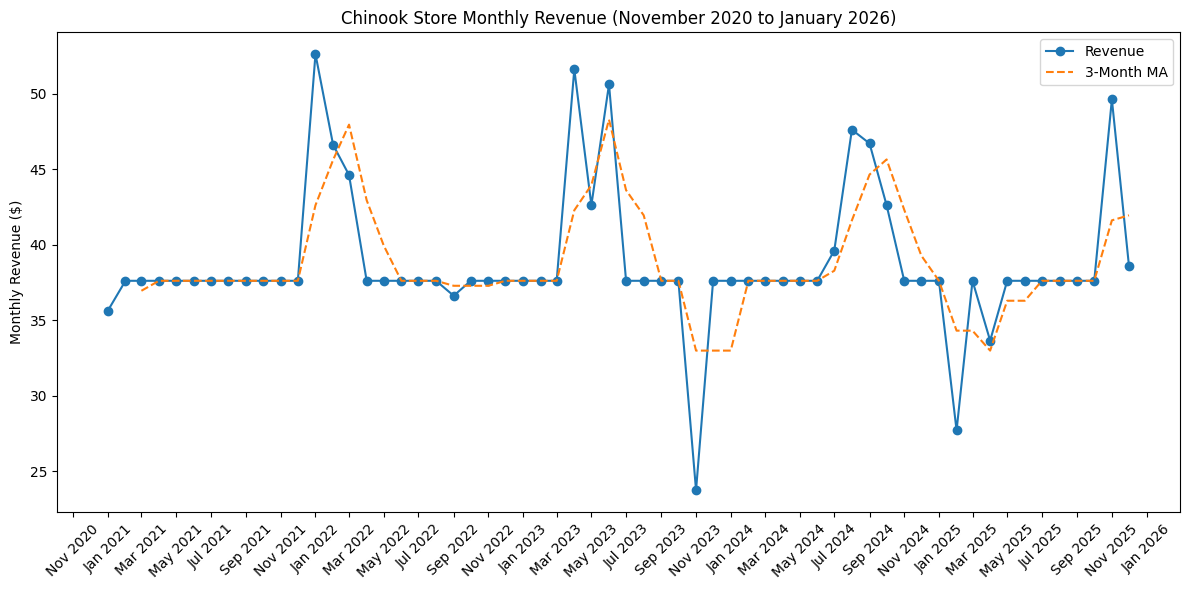

In [72]:
#Graphing Monthly Revenue

# 3-month moving average
revenue_over_time['Moving_Avg'] = revenue_over_time['Revenue'].rolling(3).mean()
# Month-over-month growth %
revenue_over_time['Pct_Change'] = revenue_over_time['Revenue'].pct_change() * 100

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert to datetime
revenue_over_time['Month_dt'] = pd.to_datetime(revenue_over_time['Month'], format='%Y/%m')

fig, ax = plt.subplots(figsize=(12,6))

# Plot revenue + moving average
ax.plot(revenue_over_time['Month_dt'], revenue_over_time['Revenue'], marker='o', label='Revenue')
ax.plot(revenue_over_time['Month_dt'], revenue_over_time['Moving_Avg'], linestyle='--', label='3-Month MA')

# Set ticks every 1 month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # interval=2 or 3 for fewer ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Jan 2021, Feb 2021, etc.

plt.title('Chinook Store Monthly Revenue (November 2020 to January 2026)')
plt.ylabel('Monthly Revenue ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


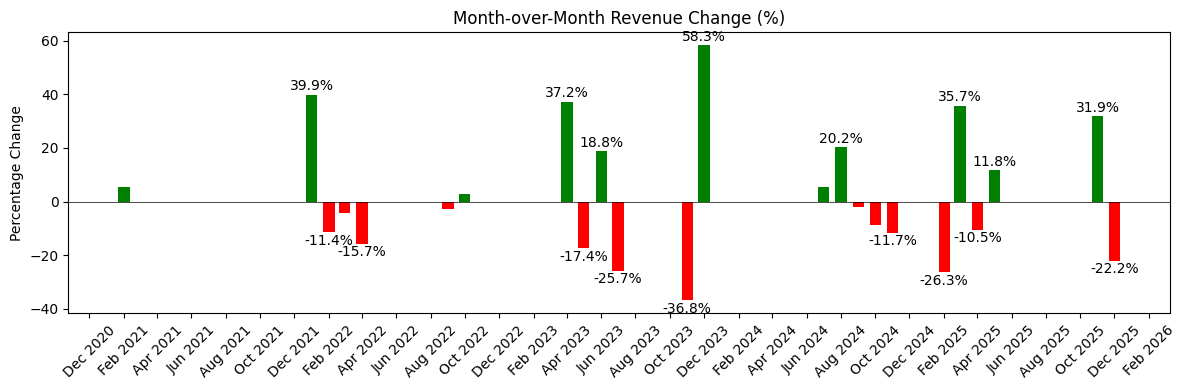

In [73]:
# Graphing monthly revenue percentage change
fig, ax = plt.subplots(figsize=(12,4))

colors = ['green' if x >= 0 else 'red' for x in revenue_over_time['Pct_Change']]
bars = ax.bar(revenue_over_time['Month_dt'], revenue_over_time['Pct_Change'], width=20, color=colors)

# Set x-axis ticks every 2 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Jan 2021, Mar 2021, etc.
plt.xticks(rotation=45)

# Horizontal line at y=0
ax.axhline(y=0, color='black', linewidth=.5)

# Add labels on top of bars
for bar, pct in zip(bars, revenue_over_time['Pct_Change']):
    height = bar.get_height()
    # Adjust text position slightly above the bar (+ for positive, - for negative)
    if height != 0 and height > 10 or height <-10:
        if height >= 0:
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{pct:.1f}%', ha='center', va='bottom')
        else:
            ax.text(bar.get_x() + bar.get_width()/2, height - 0.5, f'{pct:.1f}%', ha='center', va='top')

plt.title('Month-over-Month Revenue Change (%)')
plt.ylabel('Percentage Change')
plt.tight_layout()
plt.show()

**Insight**

Revenue between 2020 and 2026 has remained highly stable, averaging **$37.62 per month**. Only two major drops in monthly revenue were observed, a **36.8%** drop in revenue for **November 2023** and a subsequent drop around **January 2025 (26.3%)**. Revenue shocks were temporary and mean-reverting signalling temporary disruption rather than structural change.

There were no sustained upward or downward trends over the six-year period, and no clear seasonal patterns. Higher revenue months occurred irregularly and non-consistently throughout the years. 

Considering the stability in sales over the years, it suggests the business has a consistent but limited customer base, with revenue constrained to customer demand rather than seasonal or demand growth. The store would benefit from increasing customer acquisition and/or expanding product offering for sustained revenue growth.


---

## Question 10: What is the average total revenue per customer?

**Business Question:**

Explore what the average customer spends in the Chinook store.

In [79]:
# Question 10 - Average amount spent by customers?

with open('../queries/10_avg_spend.sql', 'r') as file:
    query = file.read()

avg_spend = pd.read_sql(query, conn)
avg_spend

,AverageCustomerSpend
0,39.467797


**Insight** 

The average lifetime amount spent by each customer through the Chinook store is **$39.47**. Recall that the highest spenders were in the mid to high $40s so there is limited variation in individual customer lifetime spending. This reflects individual customers contributing a fairly equal share to revenue. 

Strategies to increase revenue should target customer acquisition rather than relying on a small number of individuals to drive revenue. 

---

## Question 11: What is the average value of a transaction?

**Business Question:**

Insight into the average spend for any transaction will be useful to gauge buying patterns.

In [82]:
# Question 11 - How much is the average transaction?

with open('../queries/11_avg_transaction.sql', 'r') as file:
    query = file.read()

avg_transaction = pd.read_sql(query, conn)
avg_transaction

,AVG(Total)
0,5.651942


**Insight**

The average transaction value is **$5.65** **per invoice**. The small transaction values suggest revenue is coming from high volume rather than large single purchases. This suggests that customers are making around 7 purchases to reach their lifetime spending amounts. ($39.47 ÷ $5.65 ≈ 7)

To drive revenue growth, Chinook should explore increasing customer buying frequency and expanding customer base. As the transactions are inexpensive, providing incentives for repeat purchases would be a good strategy for increasing frequency. Another strategy could be upselling or bundling through playlists or related artists.  

---

## Question 12: Which country has the highest spending customers on average?

**Business Question:**

Explore disparities between countries.

In [90]:
# Question 12: Do customers from different countries spend different amounts?

with open('../queries/12_country_avg.sql', 'r') as file:
    query = file.read()

country_avg = pd.read_sql(query, conn)
country_avg

,BillingCountry,AverageCustomerSpend
0,Chile,6.660000
1,Ireland,6.517143
2,Hungary,6.517143
3,Czech Republic,6.445714
4,Austria,6.088571
5,Finland,5.945714
6,Netherlands,5.802857
7,India,5.789231
8,USA,5.747912
9,Norway,5.660000


**Insight**

The average customer spend grouped by countries shows that the highest spenders on average are in **Chile ($6.66), Ireland ($6.52), and Hungary ($6.52)**. These results are consistent with the average transaction spend across all invoices at $5.65. The difference between highest and lowest average spend per country is only **$1.29** ($6.66 and $5.37 respectively). 

There is minimal variation in spending behaviour showing customers are buying a similar amount of tracks regardless of location.

Marketing should focus on customer acquisition and retention rather than targeting geographical regions because spending is fairly uniform globally.  

